# Exploring CIFAR10 Convolutional Neural Networks in TensorFlow/Keras
### Olivier Kuhn de Chizelle
##### 10/12/2022


### Load Required Libraries

In [1]:
import numpy as np
import keras
from keras import layers 
from keras import models
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Define Preliminary Image Visualization Function

In [2]:
def visualize(image):
    plt.imshow(image, cmap=plt.cm.gray); plt.show()    

### Load and Explore Data

Le't's build an easy model from the MNIST Dataset.

Our Data contains 60000 28x28 GrayScale Training images and 10000 28x28 GrayScale Testing images. 

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
# EXAMINE SHAPE OF THE DATA
print("---------- RAW TRAIN ----------")
print("x", x_train.shape)
print("y", y_train.shape)

print("---------- RAW TEST ----------")
print("x", x_test.shape)
print("y", y_test.shape)


---------- RAW TRAIN ----------
x (50000, 32, 32, 3)
y (50000, 1)
---------- RAW TEST ----------
x (10000, 32, 32, 3)
y (10000, 1)


In [5]:
# RESHAPE OUR DATA
x_train = x_train.reshape((50000,32,32,3))
x_test = x_test.reshape((10000,32,32,3))

# NORMALIZE OUR DATA
x_train = x_train.astype('float32') / 255 
x_test = x_test.astype('float32') / 255  


# CONVERT Y_TRAIN AND Y_TEST TO BINARY CLASS MATRICES
print("BEFORE CONVERSION \n", y_train[0])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("AFTER CONVERSION \n", y_train[0])

BEFORE CONVERSION 
 [6]
AFTER CONVERSION 
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
# EXAMINE SHAPE OF THE RESHAPED DATA
print("---------- RESHAPED TRAIN ----------")
print("x", x_train.shape)
print("y", y_train.shape)

print("---------- RESHAPED TEST ----------")
print("x", x_test.shape)
print("y", y_test.shape)

---------- RESHAPED TRAIN ----------
x (50000, 32, 32, 3)
y (50000, 10)
---------- RESHAPED TEST ----------
x (10000, 32, 32, 3)
y (10000, 10)


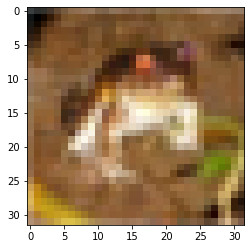

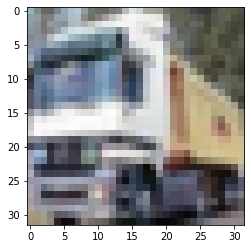

In [7]:
visualize(x_train[0])
visualize(x_train[1])

### Build Model

In [8]:
# DEFINE FUNCTION TO BUILD SEQUENTIAL MODEL

def BuildModel(input_shape: tuple, num_layers: int, kernel_dim: tuple, activation: str, pooling_dim: tuple, num_classes: int, summarize: bool):
    """
    Returns Keras CNN
    input_shape: dimensions of the images
    num_layers: Number of Convolutional Layers req: >= 1
    kernel_dim: Dimensions of Conv2D Kernel
    activation: Activation Function at each Convolutional Layer
    pooling_dim: Dimensions of MaxPooling
    num_classes: Number of Classes to predict
    summarize: Boolean, prints model.summary() 
    """
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_dim, activation = activation, input_shape= input_shape))
    model.add(layers.MaxPooling2D(pooling_dim))
    
    for i in range(num_layers - 2):
        model.add(layers.Conv2D(64, kernel_dim, activation = activation))
        model.add(layers.MaxPooling2D(pooling_dim))
        
    model.add(layers.Conv2D(64, kernel_dim, activation = activation))
    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation = activation))
    model.add(layers.Dense(num_classes, activation = 'softmax'))
        
    if summarize:
        print(model.summary())
    
    return model

In [9]:
# Let's build our model!

input_shape = (32,32,3)
num_layers = 3
kernel_dim = (3,3)
activation = 'relu'
pooling_dim = (2,2)
num_classes = 10

model = BuildModel(
    input_shape = input_shape, 
    num_layers = num_layers, 
    kernel_dim = kernel_dim, 
    activation = activation, 
    pooling_dim = pooling_dim,
    num_classes = num_classes,
    summarize = True
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Train Model

In [10]:
epochs = 50
batch_size = 1250

#-------------------------------------
#COMPILE AND TRAIN MODEL
#-------------------------------------

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.2,batch_size=batch_size, verbose = 1)

Epoch 1/50
32/32 [==============================] - 11s 323ms/step - loss: 2.1788 - accuracy: 0.1959 - val_loss: 2.2138 - val_accuracy: 0.1733
Epoch 2/50
32/32 [==============================] - 10s 317ms/step - loss: 1.9648 - accuracy: 0.2951 - val_loss: 1.7836 - val_accuracy: 0.3538
Epoch 3/50
32/32 [==============================] - 10s 322ms/step - loss: 1.8478 - accuracy: 0.3419 - val_loss: 1.7673 - val_accuracy: 0.3696
Epoch 4/50
32/32 [==============================] - 10s 325ms/step - loss: 1.7797 - accuracy: 0.3690 - val_loss: 1.7151 - val_accuracy: 0.3897
Epoch 5/50
32/32 [==============================] - 10s 310ms/step - loss: 1.7064 - accuracy: 0.3921 - val_loss: 1.6503 - val_accuracy: 0.4209
Epoch 6/50
32/32 [==============================] - 10s 312ms/step - loss: 1.6161 - accuracy: 0.4252 - val_loss: 1.8495 - val_accuracy: 0.3738
Epoch 7/50
32/32 [==============================] - 10s 314ms/step - loss: 1.5924 - accuracy: 0.4372 - val_loss: 1.5607 - val_accuracy: 0.4412

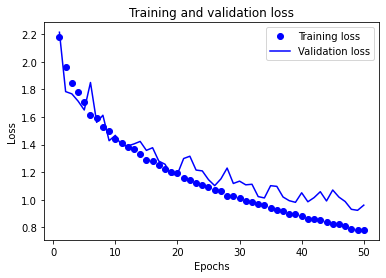

In [13]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

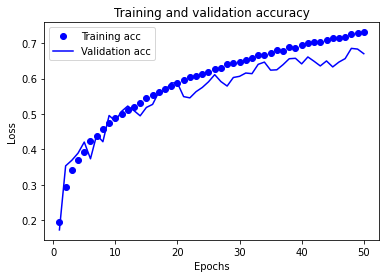

In [14]:
acc = history_dict["accuracy"]
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()